First 5 rows:
   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.000000           0.00           1.00     64.00    24.314665   
1       0.053865         103.21           6.33     64.64  2383.903686   
2       0.000000           0.74           1.05     63.95    47.849856   
3       0.000000          54.44           6.00     64.00     2.905479   
4       0.000000          54.36           6.11     64.64     3.862227   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  ...  \
0    24.314665    0.0              0.0              0.0              0.0  ...   
1  2383.903686    0.0              1.0              0.0              1.0  ...   
2    47.849856    0.0              0.0              0.0              0.0  ...   
3     2.905479    0.0              0.0              1.0              0.0  ...   
4     3.862227    0.0              0.0              1.0              0.0  ...   

          Std  Tot size           IAT  Number   Magnitue    

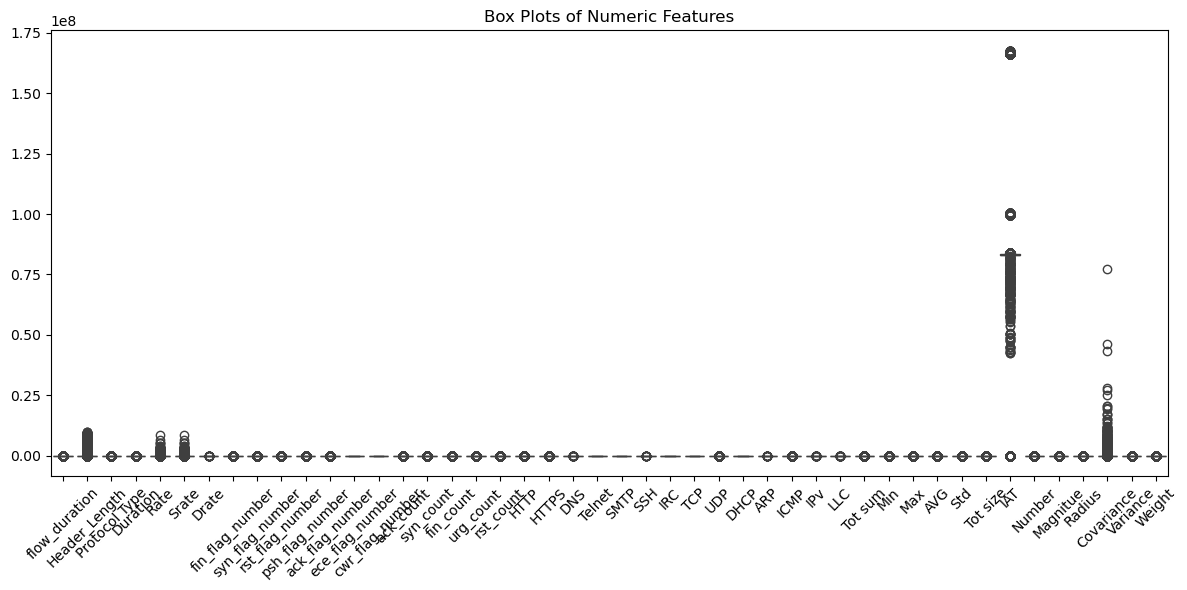

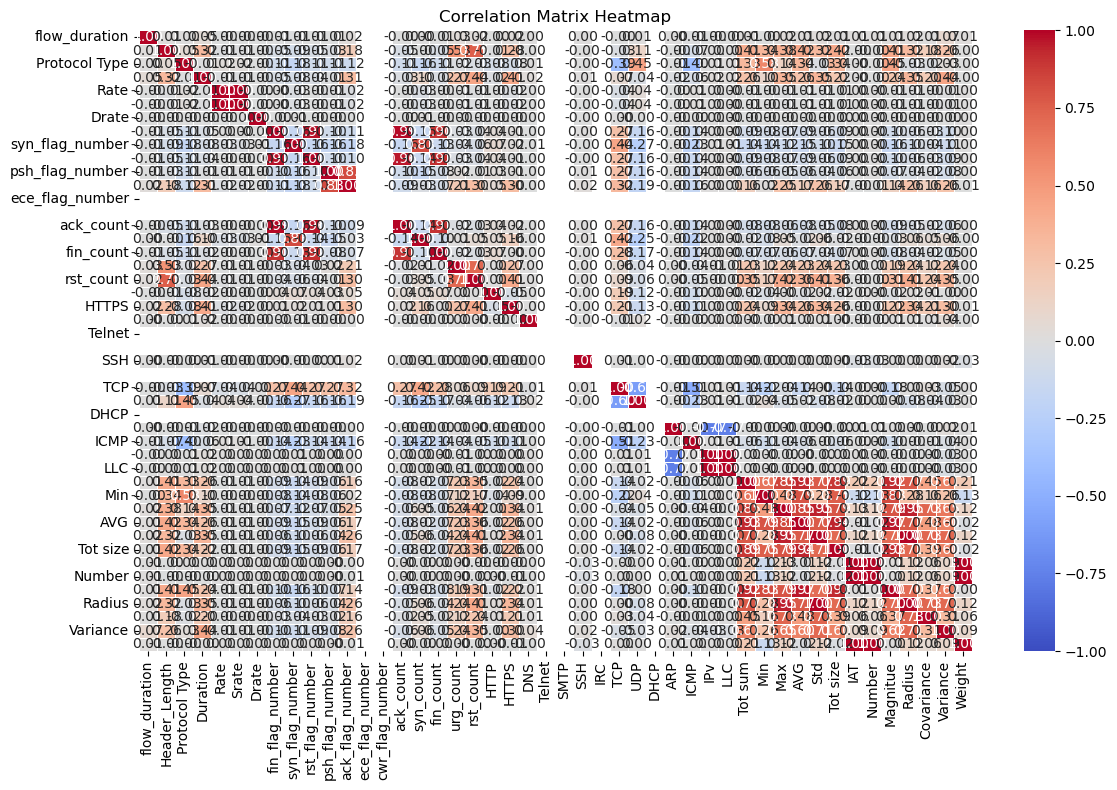

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from scipy.stats import zscore
from sklearn.impute import SimpleImputer
import lightgbm as lgb
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
# --------------------------
# Load dataset
df = pd.read_csv('C:\\ProgramData\\anaconda3\\Lib\\site-packages\\pandas\\io\\parsers\\capstone\\part-00021-363d1ba3-8ab5-4f96-bc25-4d5862db7cb9-c000.csv')

# --------------------------
# 1. Data Exploration
# --------------------------
print("First 5 rows:")
print(df.head())

print("\nDataset info:")
print(df.info())

print("\nDescriptive Statistics:")
print(df.describe())

# Visualize numeric features
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include='number'))
plt.title('Box Plots of Numeric Features')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Correlation matrix
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', 
            linewidths=0.5, vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.tight_layout()
plt.show()


In [2]:
print("\nMissing values before cleaning:")
print(df.isnull().sum())

# Drop columns with >30% missing data
threshold = 0.3 * len(df)
df_clean = df.dropna(axis=1, thresh=threshold)

# Fill remaining NaNs with median
imputer = SimpleImputer(strategy='median')
X = pd.DataFrame(imputer.fit_transform(df_clean.drop('label', axis=1)), 
                 columns=df_clean.drop('label', axis=1).columns)
y = df_clean['label']

# Remove duplicates
X = X.drop_duplicates()
y = y[X.index]  # Align labels with features
print("\nRemaining rows after cleaning:", len(X))



Missing values before cleaning:
flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
l


BINARY CLASSIFICATION: HYBRID CNN + LIGHTGBM

Class distribution before resampling: [  3649 152731]
Using SMOTE with n_neighbors=5 (min_count=3649)
Class distribution after resampling: [152731 152731]
Epoch 1/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 25s 6ms/step - accuracy: 0.9864 - loss: 0.0586 - val_accuracy: 0.9998 - val_loss: 0.0134
Epoch 2/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 25s 7ms/step - accuracy: 0.9921 - loss: 0.0303 - val_accuracy: 0.9992 - val_loss: 0.0311
Epoch 3/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9932 - loss: 0.0274 - val_accuracy: 0.9991 - val_loss: 0.0158
Epoch 4/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9936 - loss: 0.0261 - val_accuracy: 0.9995 - val_loss: 0.0086
Epoch 5/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 23s 6ms/step - accuracy: 0.9937 - loss: 0.0259 - val_accuracy: 0.9999 - val_loss: 0.0136
Epoch 6/15
3819/3819 ━━━━━━━━━━━━━━━━━━━━ 24s 6ms/step - accuracy: 0.9939 - loss: 0.0244 - val_accuracy: 0.9985 - val_loss: 0.0165
Epoch 7/15
3

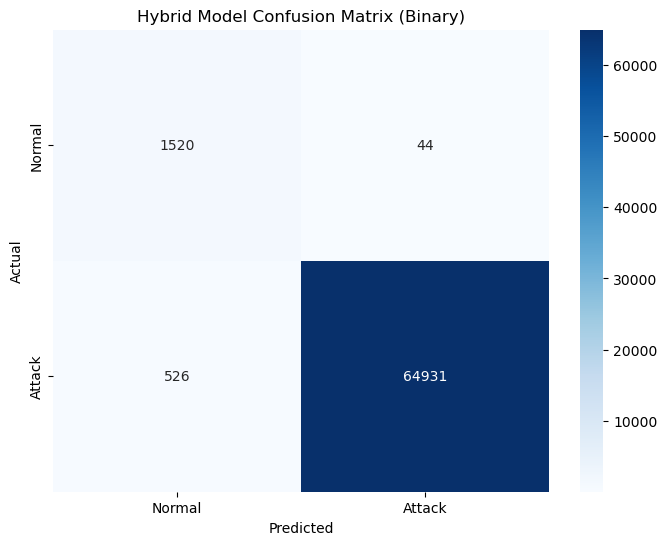


MULTICLASS CLASSIFICATION: HYBRID CNN + LIGHTGBM

Class distribution before resampling: [   13  3649    18    28   930    99 23952  1541 13628 13578 13623    69
 12003 15170 18170   999   592    37   236  6695  8975 11169  1023  3424
  2493  3023   455   320     8   298    15     4   130    13]
Using RandomOverSampler (min_count=4)
Class distribution after resampling: [23952 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952
 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952
 23952 23952 23952 23952 23952 23952 23952 23952 23952 23952]
Epoch 1/20
10180/10180 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.7145 - loss: 0.7127 - val_accuracy: 0.0921 - val_loss: 7.0200
Epoch 2/20
10180/10180 ━━━━━━━━━━━━━━━━━━━━ 65s 6ms/step - accuracy: 0.9152 - loss: 0.2136 - val_accuracy: 0.1237 - val_loss: 6.2533
Epoch 3/20
10180/10180 ━━━━━━━━━━━━━━━━━━━━ 64s 6ms/step - accuracy: 0.9532 - loss: 0.1366 - val_accuracy: 0.1208 - val_loss: 5.8057
Epoch 4/20
10180/1018

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


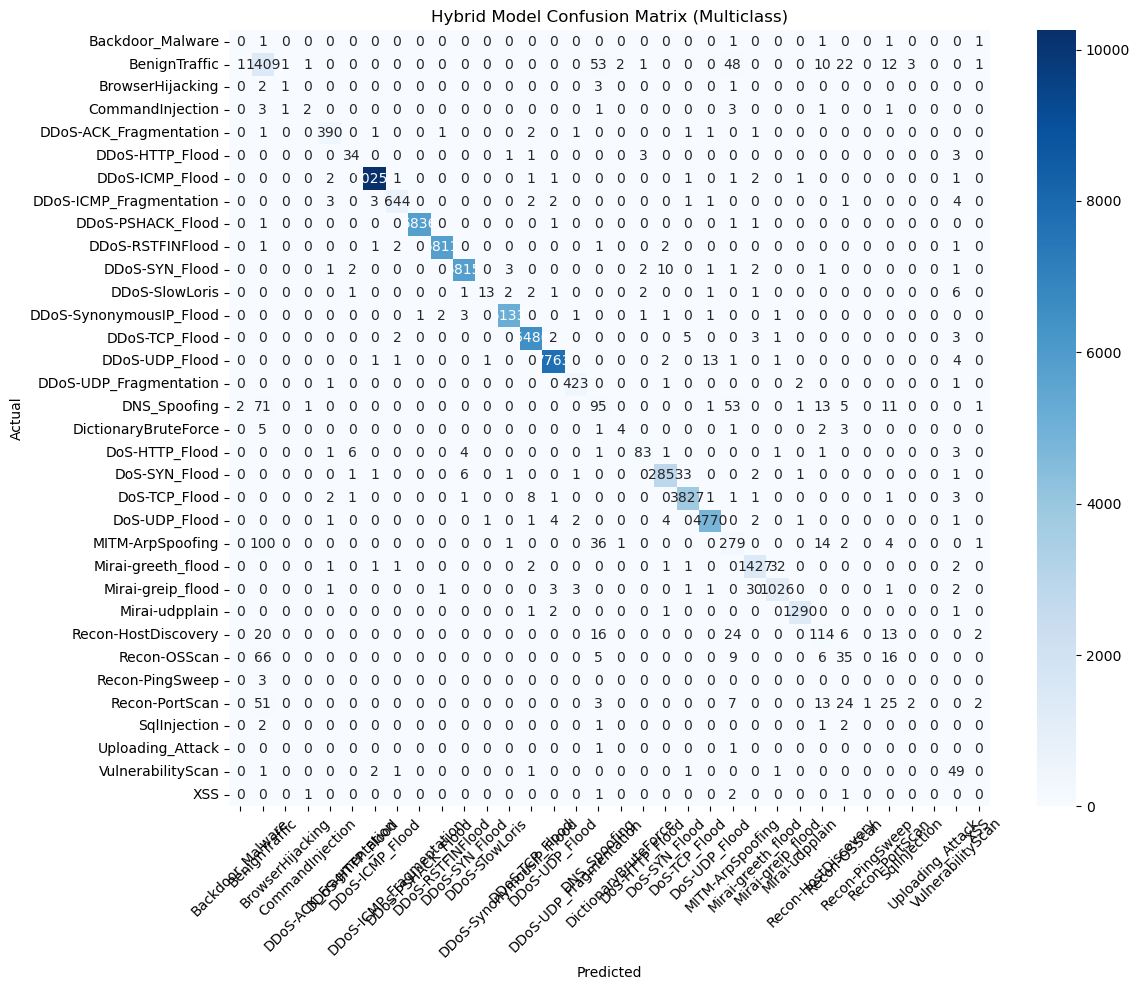

In [3]:
# --------------------------
# 2. Safe Resampling Function (MOVED UP)
# --------------------------
from imblearn.over_sampling import RandomOverSampler, SMOTE  # ADDED IMPORT

def safe_resample(X, y):
    class_counts = np.bincount(y)
    min_count = min(class_counts)
    
    if min_count <= 5:  # Use RandomOverSampler for small classes
        print(f"Using RandomOverSampler (min_count={min_count})")
        ros = RandomOverSampler(random_state=42)
        return ros.fit_resample(X, y)
    else:  # Use SMOTE with adjusted neighbors
        n_neighbors = min(5, min_count - 1)
        print(f"Using SMOTE with n_neighbors={n_neighbors} (min_count={min_count})")
        smote = SMOTE(k_neighbors=n_neighbors, random_state=42)
        return smote.fit_resample(X, y)

# Rest of your code remains unchanged below this point

# --------------------------
# 3. CNN Feature Extractor Model
# --------------------------
def create_cnn_feature_extractor(input_shape, num_classes, task_type='binary'):
    inputs = Input(shape=input_shape)
    
    # CNN layers
    x = Conv1D(64, 3, activation='relu', padding='same')(inputs)
    x = MaxPooling1D(2)(x)
    x = Conv1D(128, 3, activation='relu', padding='same')(x)
    x = MaxPooling1D(2)(x)
    x = Flatten()(x)
    
    # Dense layers
    x = Dense(256, activation='relu')(x)
    x = Dropout(0.5)(x)
    features = Dense(128, activation='relu')(x)
    
    # Output layer
    if task_type == 'binary':
        outputs = Dense(1, activation='sigmoid')(features)
    else:
        outputs = Dense(num_classes, activation='softmax')(features)
    
    model = Model(inputs=inputs, outputs=outputs)
    feature_extractor = Model(inputs=inputs, outputs=features)
    return model, feature_extractor

# --------------------------
# 4. Binary Classification (Hybrid CNN + LightGBM)
# --------------------------
print("\n" + "="*50)
print("BINARY CLASSIFICATION: HYBRID CNN + LIGHTGBM")
print("="*50)

# Encode labels
le_binary = LabelEncoder()
y_encoded = le_binary.fit_transform(y)

# Create binary labels
benign_keywords = ['benign', 'normal', 'legitimate']
benign_indices = [i for i, cls in enumerate(le_binary.classes_) 
                 if any(kw in cls.lower() for kw in benign_keywords)]
y_binary = np.where(np.isin(y_encoded, benign_indices), 0, 1)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_binary, test_size=0.3, stratify=y_binary, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handle class imbalance safely
print("\nClass distribution before resampling:", np.bincount(y_train))
X_balanced, y_balanced = safe_resample(X_train_scaled, y_train)
print("Class distribution after resampling:", np.bincount(y_balanced))

# Reshape data for CNN
X_train_reshaped = X_balanced.reshape(X_balanced.shape[0], X_balanced.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create and train CNN model
input_shape = (X_train_reshaped.shape[1], 1)
cnn_model, feature_extractor = create_cnn_feature_extractor(input_shape, 1, 'binary')
cnn_model.compile(optimizer=Adam(0.001), 
                  loss='binary_crossentropy', 
                  metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
history = cnn_model.fit(
    X_train_reshaped, y_balanced,
    epochs=15,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Extract features using CNN
train_features = feature_extractor.predict(X_train_reshaped)
test_features = feature_extractor.predict(X_test_reshaped)

# Train LightGBM on CNN features
lgb_binary = lgb.LGBMClassifier(
    num_leaves=31,
    max_depth=-1,
    learning_rate=0.1,
    n_estimators=200,
    class_weight='balanced'
)
lgb_binary.fit(train_features, y_balanced)

# Evaluate hybrid model
y_pred_binary = lgb_binary.predict(test_features)
accuracy_binary = accuracy_score(y_test, y_pred_binary)
print(f"\nHybrid Model Accuracy: {accuracy_binary:.4f}")

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred_binary, target_names=['Normal', 'Attack']))

# Confusion matrix
cm_binary = confusion_matrix(y_test, y_pred_binary)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_binary, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Normal', 'Attack'], 
            yticklabels=['Normal', 'Attack'])
plt.title('Hybrid Model Confusion Matrix (Binary)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 5. Multiclass Classification (Hybrid CNN + LightGBM)
# --------------------------
print("\n" + "="*50)
print("MULTICLASS CLASSIFICATION: HYBRID CNN + LIGHTGBM")
print("="*50)

# Encode labels
le_multiclass = LabelEncoder()
y_multiclass = le_multiclass.fit_transform(y)

# Split data
X_train_mc, X_test_mc, y_train_mc, y_test_mc = train_test_split(
    X, y_multiclass, test_size=0.3, stratify=y_multiclass, random_state=42
)

# Standardize features
scaler_mc = StandardScaler()
X_train_scaled_mc = scaler_mc.fit_transform(X_train_mc)

   
X_test_scaled_mc = scaler_mc.transform(X_test_mc)

# Handle class imbalance safely
print("\nClass distribution before resampling:", np.bincount(y_train_mc))
X_balanced_mc, y_balanced_mc = safe_resample(X_train_scaled_mc, y_train_mc)
print("Class distribution after resampling:", np.bincount(y_balanced_mc))

# Reshape data for CNN
X_train_mc_reshaped = X_balanced_mc.reshape(X_balanced_mc.shape[0], X_balanced_mc.shape[1], 1)
X_test_mc_reshaped = X_test_scaled_mc.reshape(X_test_scaled_mc.shape[0], X_test_scaled_mc.shape[1], 1)

# Create and train CNN model
num_classes = len(np.unique(y_balanced_mc))
cnn_model_mc, feature_extractor_mc = create_cnn_feature_extractor(input_shape, num_classes, 'multiclass')
cnn_model_mc.compile(optimizer=Adam(0.001), 
                     loss='sparse_categorical_crossentropy', 
                     metrics=['accuracy'])

history_mc = cnn_model_mc.fit(
    X_train_mc_reshaped, y_balanced_mc,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Extract features using CNN
train_features_mc = feature_extractor_mc.predict(X_train_mc_reshaped)
test_features_mc = feature_extractor_mc.predict(X_test_mc_reshaped)

# Train LightGBM on CNN features
lgb_mc = lgb.LGBMClassifier(
    num_leaves=127,
    max_depth=-1, learning_rate=0.05,
    n_estimators=300,
    class_weight='balanced'
)
lgb_mc.fit(train_features_mc, y_balanced_mc)

# Evaluate hybrid model
y_pred_mc = lgb_mc.predict(test_features_mc)
accuracy_mc = accuracy_score(y_test_mc, y_pred_mc)
print(f"\nHybrid Model Accuracy (Multiclass): {accuracy_mc:.4f}")

# Classification report
class_names = le_multiclass.classes_
print("\nClassification Report:")
print(classification_report(y_test_mc, y_pred_mc, target_names=class_names))
# Confusion matrix
cm_mc = confusion_matrix(y_test_mc, y_pred_mc)
plt.figure(figsize=(12, 10))
sns.heatmap(cm_mc, annot=True, fmt='d', cmap='Blues', 
            xticklabels=class_names, 
            yticklabels=class_names)
plt.title('Hybrid Model Confusion Matrix (Multiclass)')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()


EXPLAINABLE AI (XAI) USING SHAP

Explaining Binary Classification Model...


C:\ProgramData\anaconda3\Lib\site-packages\shap\explainers\_tree.py:544: UserWarning: LightGBM binary classifier with TreeExplainer shap values output has changed to a list of ndarray
  warnings.warn(


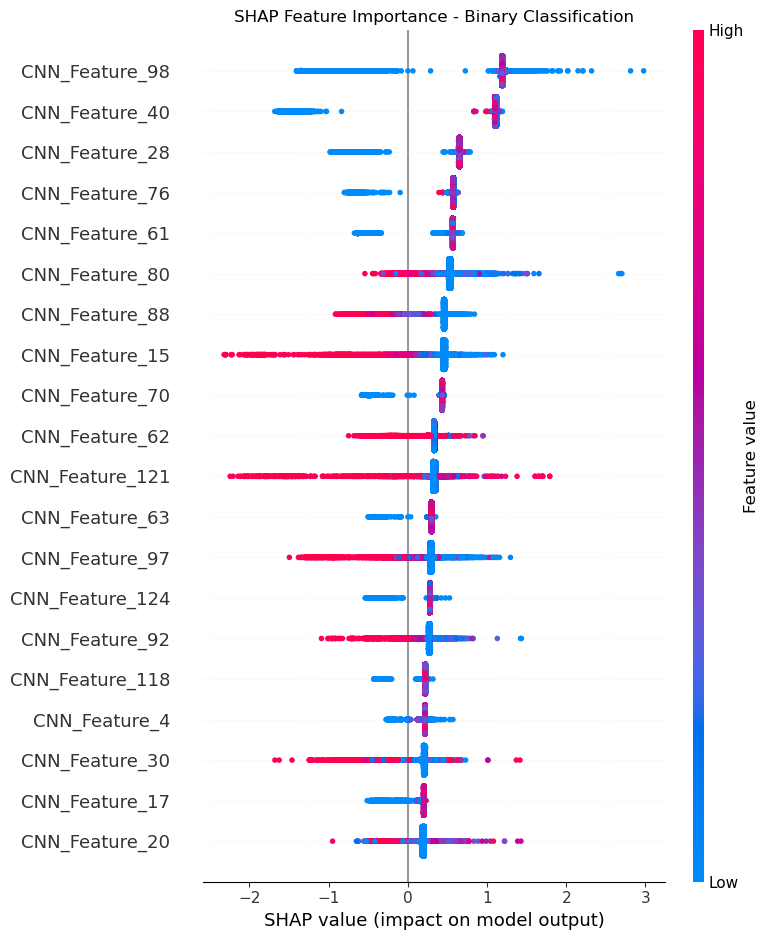

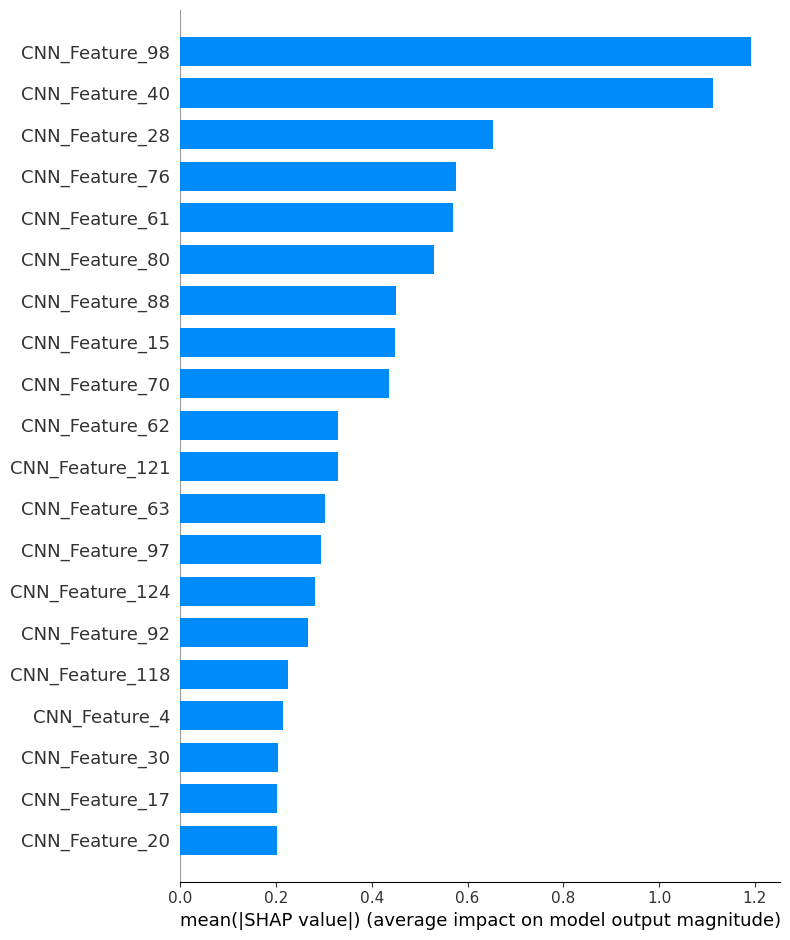

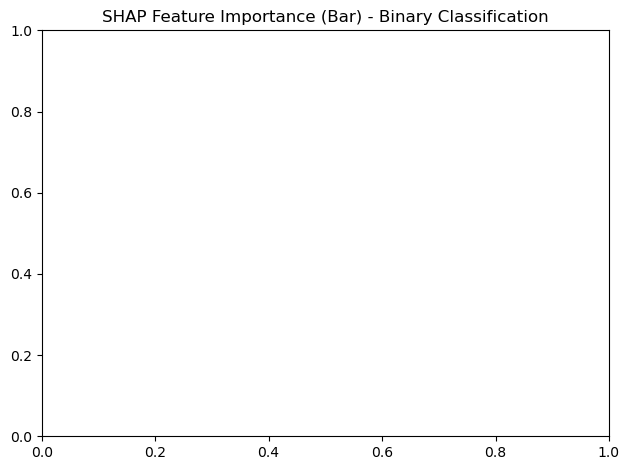


Waterfall plot for sample index 0 (True class: 1 - Attack)


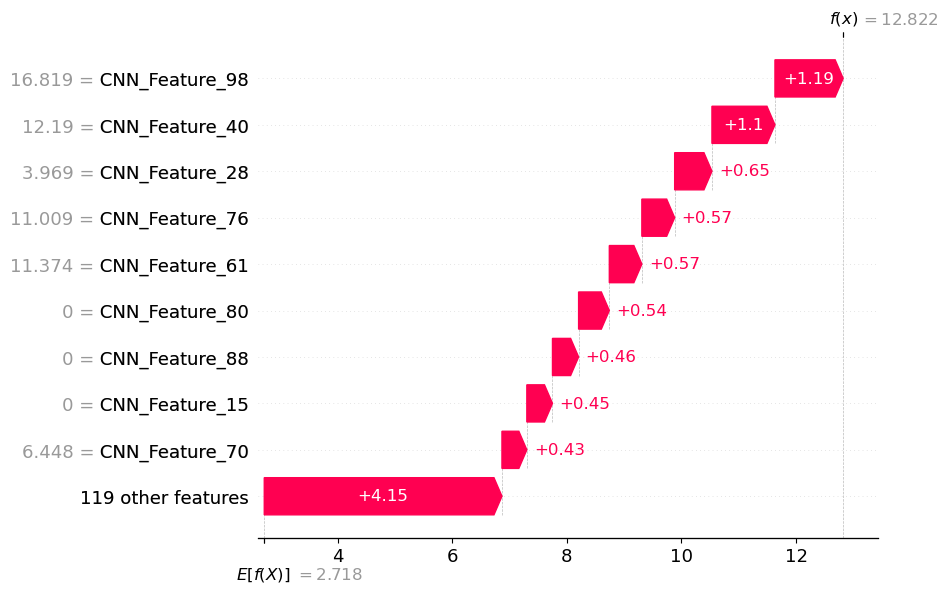

<Figure size 640x480 with 0 Axes>

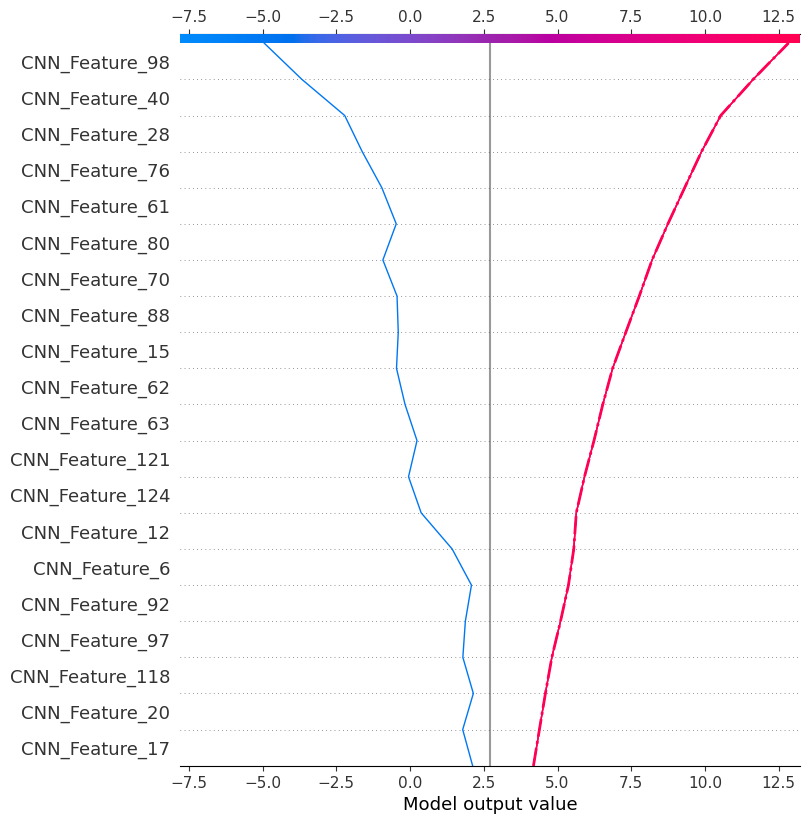

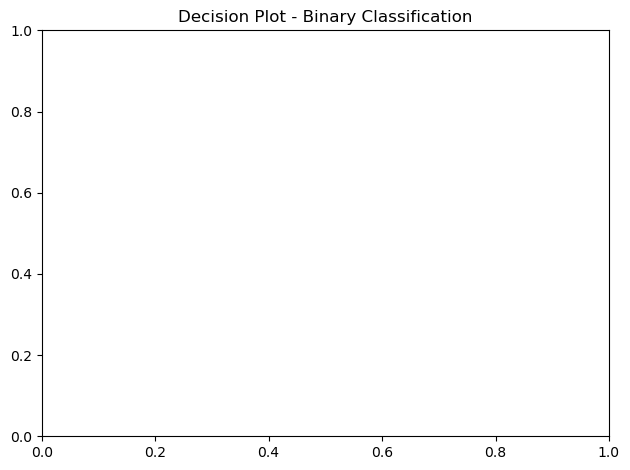


Explaining Multiclass Classification Model...


In [ ]:
import shap
import matplotlib.pyplot as plt

# --------------------------
# 6. XAI with SHAP for Hybrid Models (UPDATED)
# --------------------------
print("\n" + "="*50)
print("EXPLAINABLE AI (XAI) USING SHAP")
print("="*50)

# =================================================================
# A. Explain Binary Classification Model
# =================================================================
print("\nExplaining Binary Classification Model...")

# Create SHAP explainer
explainer_binary = shap.TreeExplainer(lgb_binary)
shap_values_binary = explainer_binary.shap_values(test_features)

# Handle SHAP values format for binary classification
if isinstance(shap_values_binary, list):
    shap_values_binary = shap_values_binary[1]  # Use positive class SHAP values

# 1. Summary Plot
plt.figure(figsize=(10, 8))
shap.summary_plot(shap_values_binary, test_features, 
                  feature_names=[f"CNN_Feature_{i}" for i in range(test_features.shape[1])],
                  show=False)
plt.title("SHAP Feature Importance - Binary Classification")
plt.tight_layout()
plt.show()

# 2. Bar Plot
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values_binary, test_features, plot_type="bar",
                  feature_names=[f"CNN_Feature_{i}" for i in range(test_features.shape[1])])
plt.title("SHAP Feature Importance (Bar) - Binary Classification")
plt.tight_layout()
plt.show()

# 3. Waterfall Plot (Alternative to force plot)
sample_idx = 0
print(f"\nWaterfall plot for sample index {sample_idx} (True class: {y_test[sample_idx]} - {'Normal' if y_test[sample_idx] == 0 else 'Attack'})")
plt.figure(figsize=(12, 6))
shap.plots.waterfall(shap.Explanation(values=shap_values_binary[sample_idx],
                                      base_values=explainer_binary.expected_value,
                                      data=test_features[sample_idx],
                                      feature_names=[f"CNN_Feature_{i}" for i in range(test_features.shape[1])]))
plt.tight_layout()
plt.show()

# 4. Decision Plot
plt.figure(figsize=(10, 6))
shap.decision_plot(explainer_binary.expected_value, 
                   shap_values_binary[sample_idx:sample_idx+5], 
                   feature_names=[f"CNN_Feature_{i}" for i in range(test_features.shape[1])],
                   highlight=0)
plt.title("Decision Plot - Binary Classification")
plt.tight_layout()
plt.show()

# =================================================================
# B. Explain Multiclass Classification Model
# =================================================================
print("\nExplaining Multiclass Classification Model...")

# Create SHAP explainer
explainer_multiclass = shap.TreeExplainer(lgb_mc)
shap_values_multiclass = explainer_multiclass.shap_values(test_features_mc)

# 1. Summary Plot for each class
for class_idx in range(len(le_multiclass.classes_)):
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values_multiclass[class_idx], test_features_mc,
                      feature_names=[f"CNN_Feature_{i}" for i in range(test_features_mc.shape[1])],
                      title=f"SHAP for Class: {le_multiclass.classes_[class_idx]}",
                      show=False)
    plt.tight_layout()
    plt.show()

# 2. Bar Plot
shap.summary_plot(shap_values_multiclass, test_features_mc, plot_type="bar",
                  feature_names=[f"CNN_Feature_{i}" for i in range(test_features_mc.shape[1])],
                  class_names=le_multiclass.classes_)
plt.title("Overall SHAP Feature Importance - Multiclass Classification")
plt.tight_layout()
plt.show()

# 3. Waterfall Plot for sample
sample_idx_mc = 0
true_class_idx = y_test_mc[sample_idx_mc]
true_class_name = le_multiclass.classes_[true_class_idx]
print(f"\nWaterfall plot for sample index {sample_idx_mc} (True class: {true_class_name})")

plt.figure(figsize=(14, 8))
shap.plots.waterfall(shap.Explanation(values=shap_values_multiclass[true_class_idx][sample_idx_mc],
                                      base_values=explainer_multiclass.expected_value[true_class_idx],
                                      data=test_features_mc[sample_idx_mc],
                                      feature_names=[f"CNN_Feature_{i}" for i in range(test_features_mc.shape[1])]))
plt.title(f"Waterfall Plot for Sample {sample_idx_mc} - True Class: {true_class_name}")
plt.tight_layout()
plt.show()

# 4. Decision Plot for multiclass
plt.figure(figsize=(12, 8))
shap.multioutput_decision_plot(list(explainer_multiclass.expected_value),
                               shap_values_multiclass, 
                               sample_idx_mc,
                               feature_names=[f"CNN_Feature_{i}" for i in range(test_features_mc.shape[1])],
                               legend_labels=le_multiclass.classes_,
                               legend_location='lower right',
                               highlight=true_class_idx)
plt.title(f"Multiclass Decision Plot for Sample {sample_idx_mc}")
plt.tight_layout()
plt.show()

print("\nSHAP analysis completed!")